In [8]:
import pandas as pd

# region_id, gene_id, enh_id, avg_dist
gm12878_neanderthal_df_ref = pd.read_parquet("./links/experiment_1/gm12878_neanderthal_df_ref.parquet")
hffc6_neanderthal_df_ref = pd.read_parquet("./links/experiment_1/hffc6_neanderthal_df_ref.parquet")

# region_id, gene_id, enh_id, avg_dist
gm12878_existing_links = pd.read_csv("./links/experiment_1/gm12878_existing_links.csv")
hffc6_existing_links = pd.read_csv("./links/experiment_1/hffc6_existing_links.csv")

# region_id, gene_id, enh_id, gm12878_avg_dist, hffc6_avg_dist
gm12878_hffc6_common_links = pd.read_csv("./links/experiment_1/gm12878_hffc6_common_links.csv")

# region_id, gene_id, enh_id, gm12878_avg_dist
gm12878_hffc6_gm12878_only_links = pd.read_csv("./links/experiment_1/gm12878_hffc6_gm12878_only_links.csv")

# region_id, gene_id, enh_id, hffc6_avg_dist
gm12878_hffc6_hffc6_only_links = pd.read_csv("./links/experiment_1/gm12878_hffc6_hffc6_only_links.csv")

In [43]:
distance_cutoff = {
    'H1ESC_Nean': 1.5819487888988626,
    'H1ESC_Deni': 1.5940225214185284,
    'HFFC6_Nean': 1.4982763183612486,
    'HFFC6_Deni': 1.7777412978743463,
    'WTC11_Nean': 0.49185075802354294,
    'WTC11_Deni': 0.49946283771094635,
    'GM12878_Nean': 1.3194976373807719,
    'GM12878_Deni': 1.2678860440889042
}

gm12878_neanderthal_df_ref = gm12878_neanderthal_df_ref[gm12878_neanderthal_df_ref["avg_dist"] > distance_cutoff["GM12878_Nean"]]
hffc6_neanderthal_df_ref = hffc6_neanderthal_df_ref[hffc6_neanderthal_df_ref["avg_dist"] > distance_cutoff["HFFC6_Nean"]]

gm12878_existing_links = gm12878_existing_links[gm12878_existing_links["avg_dist"] > distance_cutoff["GM12878_Nean"]]
hffc6_existing_links = hffc6_existing_links[hffc6_existing_links["avg_dist"] > distance_cutoff["HFFC6_Nean"]]

gm12878_hffc6_common_links = gm12878_hffc6_common_links[gm12878_hffc6_common_links["gm12878_avg_dist"] > distance_cutoff["GM12878_Nean"]]

gm12878_hffc6_gm12878_only_links = gm12878_hffc6_gm12878_only_links[gm12878_hffc6_gm12878_only_links["gm12878_avg_dist"] > distance_cutoff["GM12878_Nean"]]

gm12878_hffc6_hffc6_only_links = gm12878_hffc6_hffc6_only_links[gm12878_hffc6_hffc6_only_links["hffc6_avg_dist"] > distance_cutoff["HFFC6_Nean"]]

In [44]:
gm12878_hffc6_common_links

,region_id,gene_id,enh_id,gm12878_avg_dist,hffc6_avg_dist
0,chr10:69686135-77506369,ENSG00000214655,chr10:73810902-73811472,6.375730,6.561680
1,chr10:69686135-77506369,ENSG00000196968,chr10:73810902-73811472,9.035227,9.486360
2,chr10:69686135-77506369,ENSG00000176986,chr10:73810902-73811472,13.021316,13.883436
3,chr10:69686135-77506369,ENSG00000176986,chr10:73773042-73773182,6.503401,7.045008
4,chr10:69686135-77506369,ENSG00000177791,chr10:73773042-73773182,15.735377,16.373596
...,...,...,...,...,...
3651,chr8:141097277-145138636,ENSG00000178719,chr8:143568720-143569440,2.505800,13.040459
3652,chr8:141097277-145138636,ENSG00000235173,chr8:143934092-143934312,9.048569,3.394757
3653,chr8:22123909-26502339,ENSG00000197217,chr8:23068417-23068747,7.779352,7.888487
3654,chr8:27452324-30583406,ENSG00000186918,chr8:28348833-28349123,6.265243,7.586086


In [45]:
gm12878_hffc6_gm12878_only_links_distance_in_hffc6 = (
     pd.merge(
        gm12878_hffc6_gm12878_only_links,
        hffc6_neanderthal_df_ref,
        on=["region_id", "gene_id", "enh_id"],
        how="left"
     )
     .dropna()
     .rename(columns={"avg_dist": "hffc6_avg_dist"})
)

gm12878_hffc6_gm12878_only_links_distance_in_hffc6

,region_id,gene_id,enh_id,gm12878_avg_dist,hffc6_avg_dist
14,chr16:28118907-31001007,ENSG00000156858,chr16:30957969-30958709,1.337949,5.379634
19,chr17:40227320-42255967,ENSG00000167925,chr17:42112202-42112602,1.348395,5.170780
63,chr9:135770640-138394717,ENSG00000177984,chr9:136992568-136992638,1.389225,10.304418
64,chr9:135770640-138394717,ENSG00000177984,chr9:136992698-136992918,1.389225,10.176104
66,chr9:135770640-138394717,ENSG00000182154,chr9:136992568-136992638,1.391876,12.414585
...,...,...,...,...,...
9139,chr11:47305544-50688076,ENSG00000196666,chr11:47765368-47767068,19.355585,11.021787
9166,chr8:141097277-145138636,ENSG00000255181,chr8:143568720-143569440,21.651182,10.944836
9171,chr21:42550113-44551553,ENSG00000142182,chr21:44133838-44134098,21.947893,21.297939
9202,chr8:141097277-145138636,ENSG00000255181,chr8:143934092-143934312,23.472851,11.185913


In [46]:
gm12878_hffc6_hffc6_only_links_distance_in_gm12878 = (
    pd.merge(
        gm12878_hffc6_hffc6_only_links,
        gm12878_neanderthal_df_ref,
        on=["region_id", "gene_id", "enh_id"],
        how="left"
    )
    .dropna()
    .rename(columns={"avg_dist": "gm12878_avg_dist"})
)

gm12878_hffc6_hffc6_only_links_distance_in_gm12878

,region_id,gene_id,enh_id,hffc6_avg_dist,gm12878_avg_dist
1,chr1:108644134-111489899,ENSG00000065135,chr1:109090878-109092888,1.499496,4.984496
27,chr1:108644134-111489899,ENSG00000134243,chr1:109090878-109092888,1.528274,4.787907
35,chr12:120641534-122651577,ENSG00000130779,chr12:121798694-121799734,1.537565,3.976361
49,chr6:137662793-139667717,ENSG00000135597,chr6:138404603-138405143,1.558096,2.863086
57,chr1:26647143-29221619,ENSG00000159023,chr1:28510888-28513228,1.570278,1.799318
...,...,...,...,...,...
15490,chr1:116104-4081494,ENSG00000186891,chr1:1691391-1692441,29.112642,4.420716
15504,chr3:123000966-126958665,ENSG00000114491,chr3:125108126-125110186,29.496841,12.802350
15508,chr10:69686135-77506369,ENSG00000156650,chr10:75210942-75211132,30.249041,7.977507
15511,chr3:123000966-126958665,ENSG00000163848,chr3:125108126-125110186,32.030991,15.016582


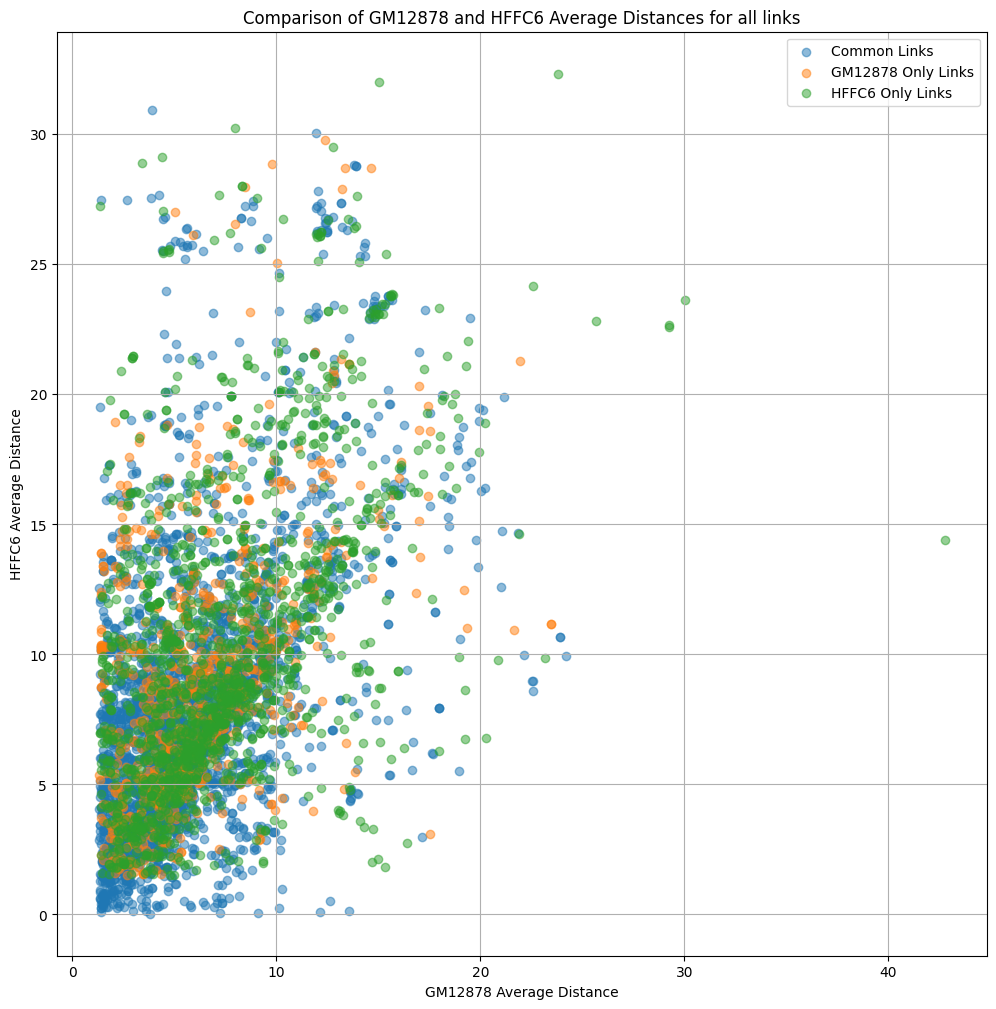

In [47]:
# Sort by distance, bar plot on top of each other gm12878_hffc6_common_links (region_id,gene_id,enh_id,gm12878_avg_dist,hffc6_avg_dist)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
plt.scatter(gm12878_hffc6_common_links["gm12878_avg_dist"], gm12878_hffc6_common_links["hffc6_avg_dist"], label="Common Links", alpha=0.5)
plt.scatter(gm12878_hffc6_gm12878_only_links_distance_in_hffc6["gm12878_avg_dist"], gm12878_hffc6_gm12878_only_links_distance_in_hffc6["hffc6_avg_dist"], label="GM12878 Only Links", alpha=0.5)
plt.scatter(gm12878_hffc6_hffc6_only_links_distance_in_gm12878["gm12878_avg_dist"], gm12878_hffc6_hffc6_only_links_distance_in_gm12878["hffc6_avg_dist"], label="HFFC6 Only Links", alpha=0.5)
plt.xlabel("GM12878 Average Distance")
plt.ylabel("HFFC6 Average Distance")
plt.title("Comparison of GM12878 and HFFC6 Average Distances for all links")
plt.legend()
plt.grid()
plt.show()

In [48]:
gm12878_hffc6_gm12878_only_links.sort_values(by="gm12878_avg_dist", ascending=True, inplace=True)
gm12878_hffc6_gm12878_only_links

/var/folders/ss/9hx8q7517rzf6x75cfny7ndc0000gp/T/ipykernel_18089/2200386891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gm12878_hffc6_gm12878_only_links.sort_values(by="gm12878_avg_dist", ascending=True, inplace=True)


,region_id,gene_id,enh_id,gm12878_avg_dist
4298,chr19:13345145-18309700,ENSG00000105640,chr19:17488941-17489001,1.320796
2653,chr16:28118907-31001007,ENSG00000176953,chr16:28952209-28952899,1.322401
428,chr11:63186244-65192942,ENSG00000171219,chr11:64742938-64743998,1.322417
3608,chr17:2037482-6752705,ENSG00000177374,chr17:2042236-2042596,1.323094
8934,chr6:28173941-34087086,ENSG00000237649,chr6:33585363-33585583,1.326376
...,...,...,...,...
7695,chr21:42550113-44551553,ENSG00000241945,chr21:44353867-44354647,24.818884
7720,chr21:42550113-44551553,ENSG00000160221,chr21:44353867-44354647,24.974258
8354,chr5:174919132-179964898,ENSG00000175309,chr5:177875859-177876529,26.372576
8458,chr5:174919132-179964898,ENSG00000197451,chr5:177875859-177876529,26.387939


In [49]:
gm12878_hffc6_hffc6_only_links.sort_values(by="hffc6_avg_dist", ascending=True, inplace=True)
gm12878_hffc6_hffc6_only_links

/var/folders/ss/9hx8q7517rzf6x75cfny7ndc0000gp/T/ipykernel_18089/3681633230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gm12878_hffc6_hffc6_only_links.sort_values(by="hffc6_avg_dist", ascending=True, inplace=True)


,region_id,gene_id,enh_id,hffc6_avg_dist
7758,chr19:34349547-36373974,ENSG00000126267,chr19:35643048-35643218,1.498864
9667,chr1:108644134-111489899,ENSG00000065135,chr1:109090878-109092888,1.499496
11614,chr1:152071370-154072772,ENSG00000143570,chr1:153977004-153977164,1.500901
1065,chr11:8672302-10681352,ENSG00000175356,chr11:8810273-8810513,1.503031
9152,chr19:45115751-47125286,ENSG00000104892,chr19:45398152-45398262,1.503476
...,...,...,...,...
473,chr10:69686135-77506369,ENSG00000156650,chr10:75210942-75211132,30.249041
349,chr10:69686135-77506369,ENSG00000156650,chr10:75211192-75211472,30.249041
10656,chr1:116104-4081494,ENSG00000186891,chr1:1625190-1625280,30.451309
13887,chr3:123000966-126958665,ENSG00000163848,chr3:125108126-125110186,32.030991


In [50]:
gm12878_gene_to_closest_avg_enhancer_all = (
     gm12878_neanderthal_df_ref
     .groupby("gene_id")
     # Only keep the closest enhancer
     .agg(
         {"enh_id": "first", "avg_dist": "min"}
     )
    .sort_values(by="avg_dist", ascending=True)
)

gm12878_gene_to_closest_avg_enhancer_all['has_link'] = gm12878_gene_to_closest_avg_enhancer_all.index.isin(gm12878_existing_links["gene_id"].unique())

hffc6_gene_to_closest_avg_enhancer_all = (
    hffc6_neanderthal_df_ref
    .groupby("gene_id")
    # Only keep the closest enhancer
    .agg(
        {"enh_id": "first", "avg_dist": "min"}
    )
    .sort_values(by="avg_dist", ascending=True)
)

hffc6_gene_to_closest_avg_enhancer_all['has_link'] = hffc6_gene_to_closest_avg_enhancer_all.index.isin(hffc6_existing_links["gene_id"].unique())

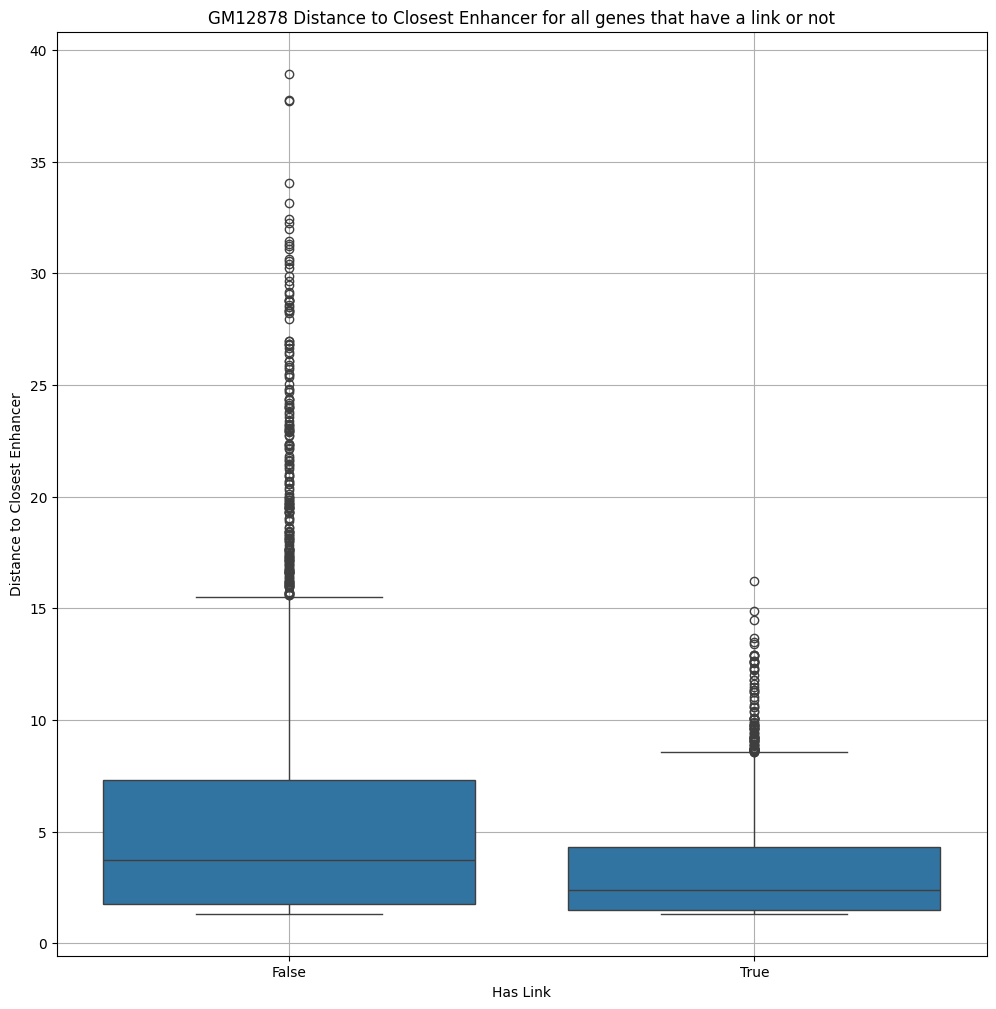

In [52]:
# Box plot of the distance to the closest enhancer for all genes that have a link or not in GM12878
import seaborn as sns

plt.figure(figsize=(12, 12))
sns.boxplot(data=gm12878_gene_to_closest_avg_enhancer_all, x="has_link", y="avg_dist")
plt.xlabel("Has Link")
plt.ylabel("Distance to Closest Enhancer")
plt.title("GM12878 Distance to Closest Enhancer for all genes that have a link or not")
plt.grid()
plt.show()

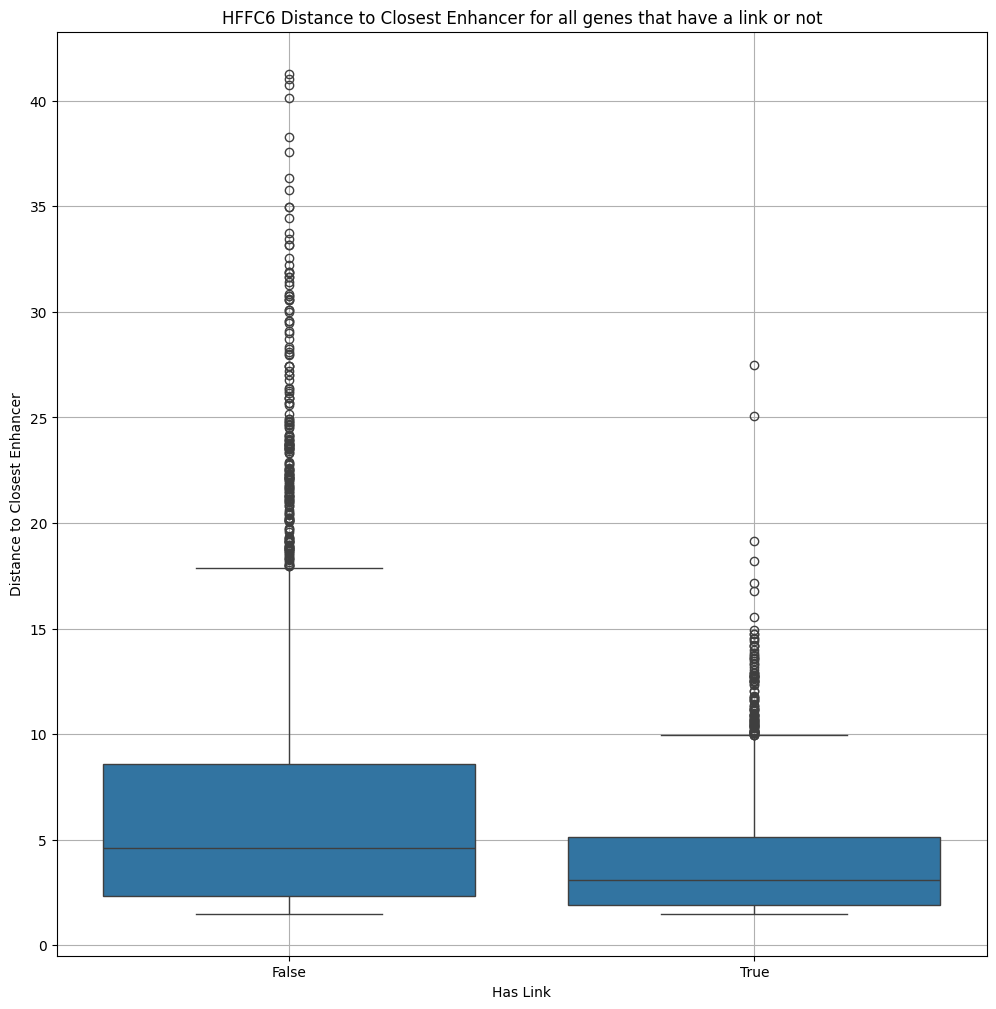

In [53]:
 # Box plot of the distance to the closest enhancer for all genes that have a link or not in HFFC6
plt.figure(figsize=(12, 12))
sns.boxplot(data=hffc6_gene_to_closest_avg_enhancer_all, x="has_link", y="avg_dist")
plt.xlabel("Has Link")
plt.ylabel("Distance to Closest Enhancer")
plt.title("HFFC6 Distance to Closest Enhancer for all genes that have a link or not")
plt.grid()
plt.show()